In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Visualisation des données

### 2.1. Distribution des étiquettes

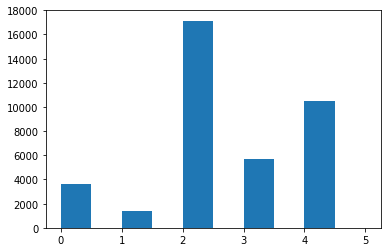

In [4]:
%run data_importation.py
plt.hist(y, range = (0, 5))
plt.show()

### 2.2. Visualisation des signaux

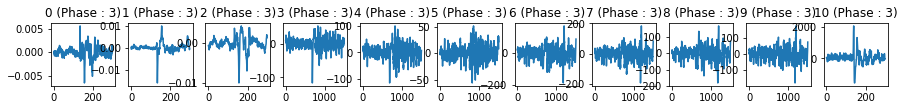

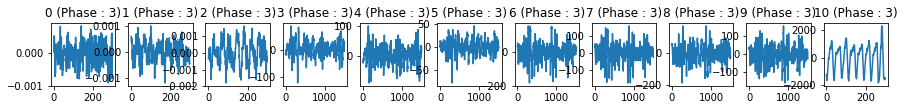

In [5]:
for i in range(2):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        plt.subplot(11,11,k_id+1)
        plt.plot(X_train[k][i])
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

## 3. Analyse fréquentielle

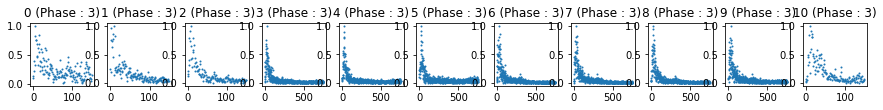

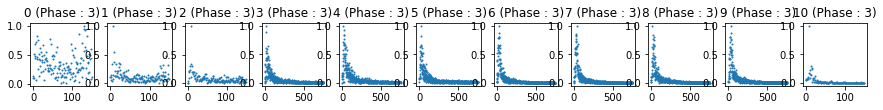

In [6]:
for i in range(2):
    plt.figure(figsize=(15,15))
    for k_id in range(len(keys)):
        k=keys[k_id]
        signal=X_train[k][i]
        
        Ne = len(signal)
        spectre = np.absolute(np.fft.fft(signal))
        spectre = spectre[0:len(spectre)//2]
        spectre = [s/max(spectre) for s in spectre]
        
        plt.subplot(11,11,k_id+1)
        plt.plot(spectre, marker="o", markersize=1, linestyle="none")
        plt.title(str(k_id) + " (Phase : " + str(y[i]) + ")")

### Observations :

L'amplitude des fréquences varie en fonction de la phase... à compléter

## 3. Cross-validation

In [35]:
import feature_extraction

X_train_fft = h5py.File('X_train_fft.h5','r')
X_test_fft = h5py.File('X_test_fft.h5','r')

#X_train_preprocessed = feature_extraction.extractMultiFeatureAll(X_train_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="trainX")
#X_test_preprocessed = feature_extraction.extractMultiFeatureAll(X_test_fft, [feature_extraction.nbPikesOne], [[5,0.2]], save=True, name_save="testX")

X_train_preprocessed = np.loadtxt('testX.txt',  delimiter=',', usecols=range(1, 2)).astype('float')
X_test_preprocessed = np.loadtxt('testY.txt',  delimiter=',', usecols=range(1, 2)).astype('float')

### Apprentissage

In [36]:
import cross_validation_learning
import sklearn

mat_theta, mat_ypred, mat_yprob = cross_validation_learning.learnAndPredict(X_train_preprocessed, sklearn.neighbors.KNeighborsClassifier, [[range(1,30,2)]], 10)

AttributeError: module 'cross_validation_learning' has no attribute 'learnAndPredict'

### Résultats

= : 21256


Text(0.5,1,'Nearest neighbors classification')

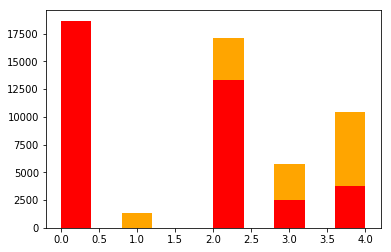

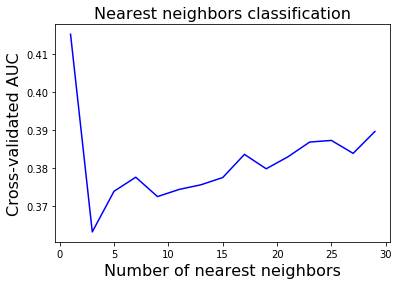

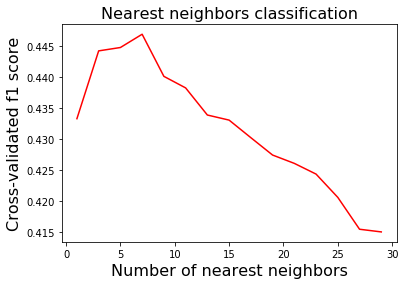

In [69]:
print("= :",sum(ypred==y))
a = (ypred==y)*ypred
plt.figure()
hist(y, color="orange")
hist(a, color="red")

plt.figure()
plt.plot(range(1, 30, 2), aurocs, color='blue')
plt.xlabel('Number of nearest neighbors', fontsize=16)
plt.ylabel('Cross-validated AUC', fontsize=16)
plt.title('Nearest neighbors classification', fontsize=16)


plt.figure()
plt.plot(range(1, 30, 2), f1_scores, color='red')
plt.xlabel('Number of nearest neighbors', fontsize=16)
plt.ylabel('Cross-validated f1 score', fontsize=16)
plt.title('Nearest neighbors classification', fontsize=16)